# Instructions

1. Add your name and HW Group Number below.
2. Complete each question. Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".
3. Where applicable, run the test cases *below* each question to check your work. **Note**: In addition to the test cases you can see, the instructor may run additional test cases, including using *other datasets* to validate you code.
4. Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). You can also use the **Validate** button to run all test cases.
5. Turn in your homework by going to the main screen in JupyterHub, clicking the Assignments menu, and submitting. **Also** make sure to turn in your homework on Moodle (so we have a backup copy).



In [1]:
"""
Name: Sagnik
HW Group Number: 32
"""

'\nName: Sagnik\nHW Group Number: 32\n'

## Homework 1: Problem 1: Sampling

### Import all necessary libraries

In [2]:
# you should be familiar with numpy from HW0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# we will use the iris dataset from sklearn.datasets
from sklearn import datasets

In [6]:
# Read the iris dataset and translate to pandas dataframe
iris_sk = datasets.load_iris()
# Note that the "target" attribute is species, represented as an integer
data = pd.DataFrame(data= np.c_[iris_sk['data'], iris_sk['target']],columns= iris_sk['feature_names'] + ['target'])

In [7]:
# Check rows and columns
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## 1.1 Random Sampling

In this following exercise, you will be writting code to implement random sampling **without replacement** from scratch. No additional libraries are allowed.

In [38]:
# Random is the only additional library you can use for this problem
import random

def random_sampling(data, n):
    """
    Input: data: the pandas dataframe to sample.
           n: the number of samples (rows) to take
    Output: The randomly sampled dataset (without replacement) as a pd.Dataframe.
    Hint: You should look up the random.shuffle function
    """
    shuffled_data = data.values.tolist()
    random.shuffle(shuffled_data)
    return pd.DataFrame( shuffled_data[0:n], columns= iris_sk['feature_names'] + ['target'] )

In [39]:
# Test your function
sample_data = random_sampling(data, 30)
sample_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.8,1.6,0.2,0.0
1,5.8,2.7,5.1,1.9,2.0
2,5.4,3.0,4.5,1.5,1.0
3,7.7,2.8,6.7,2.0,2.0
4,5.5,2.5,4.0,1.3,1.0


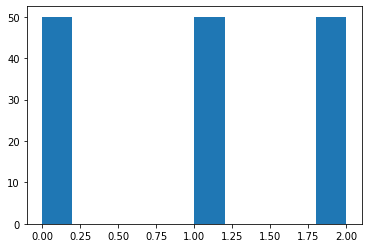

In [30]:
# Look at the distribution of the species (target attribute)
# How evenly are the species distributed with random sampling?
# Try running it again - are the results the same?
plt.hist(sample_data["target"])
plt.show()

In [8]:
test_data = data.drop_duplicates()
sample = random_sampling(test_data, 30)
# Assert that the correct number of rows were samples
np.testing.assert_equal(sample.shape,(30,5))
# Assert sampling was done without replacement
assert sample.drop_duplicates().shape[0] == 30
# Assert that the first row is present in the original dataframe
assert any([(data.iloc[i,:] == sample.iloc[0,:]).all() for i in data.index])

## 1.2 Stratified sampling
In this part, you will be writing code to do stratified sampling. You should sample the *same number* of rows for each value of the given attribute.
You can use only pandas library calls for this problem.

**Hint**: You should read about the [split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) coding pattern in Pandas before starting this problem! In particular pay attention to the following:
* [Splitting an object into groups](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups)
* [Transformation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#transformation)

How could you collect a sample from each species, and then combine them?


In [9]:
def stratified_sampling(data, n, attr):
    """
    Input: data: the dataset to sample
           n: the number of instances sampled from each value of the given attribute
           attr: the attribute to stratify on
    Output: The sampled dataset in pd.Dataframe format
    
    Allowed functions: df.groupby, df.apply, df.sample
    Hint: See the link in the function description above.
    """
    return data.groupby(by = attr, group_keys = False).apply(lambda x: x.sample(n))

In [10]:
# Test your function!
stratified_data = stratified_sampling(data, 5, 'target')
stratified_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
40,5.0,3.5,1.3,0.3,0.0
23,5.1,3.3,1.7,0.5,0.0
21,5.1,3.7,1.5,0.4,0.0
9,4.9,3.1,1.5,0.1,0.0
22,4.6,3.6,1.0,0.2,0.0
62,6.0,2.2,4.0,1.0,1.0
69,5.6,2.5,3.9,1.1,1.0
56,6.3,3.3,4.7,1.6,1.0
51,6.4,3.2,4.5,1.5,1.0
71,6.1,2.8,4.0,1.3,1.0


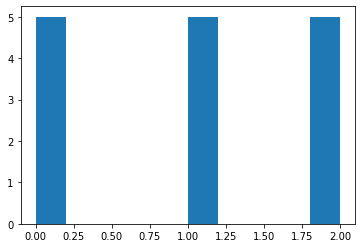

In [11]:
# look at distribution of species(target value), three species are supposed to be equally sampled.
plt.hist(stratified_data["target"])
plt.show()

In [12]:
stratified_data = stratified_sampling(data, 5, 'target')
np.testing.assert_equal(sum(stratified_data["target"] == 0),5)
np.testing.assert_equal(sum(stratified_data["target"] == 1),5)
np.testing.assert_equal(sum(stratified_data["target"] == 2),5)
assert any([(data.iloc[i,:] == stratified_data.iloc[0,:]).all() for i in data.index])

**Remember**: Make sure to complete all problems (.ipynb files) in this assignment. When you finish, double-check the submission instructions at the top of this file, and submit on JupyterHub and Moodle.